# Implementasi KNN, Naive Bayes, dan Decision Tree untuk Klasifikasi Risiko Kesehatan Ibu Hamil




## Pendahuluan

Kesehatan ibu selama masa kehamilan merupakan aspek vital dalam dunia medis, terutama karena kondisi ini sangat menentukan keselamatan dan kesejahteraan ibu dan janin. Risiko kesehatan pada ibu hamil, seperti tekanan darah tinggi (hipertensi), kadar gula darah tidak normal (diabetes gestasional), suhu tubuh yang tidak stabil, hingga detak jantung yang terlalu cepat atau lambat, dapat menyebabkan komplikasi serius baik selama kehamilan maupun saat proses persalinan. Oleh karena itu, deteksi dini terhadap risiko-risiko tersebut menjadi sangat penting untuk mencegah terjadinya kondisi darurat medis yang membahayakan.

Seiring berkembangnya teknologi, pendekatan berbasis data mulai banyak digunakan dalam dunia medis untuk membantu proses diagnosis dan pengambilan keputusan. Salah satunya adalah dengan memanfaatkan algoritma *machine learning* untuk melakukan klasifikasi risiko berdasarkan data medis yang dimiliki pasien. Dengan pendekatan ini, tenaga medis dapat memperoleh gambaran lebih cepat dan akurat mengenai kondisi pasien, serta dapat mengambil langkah preventif maupun kuratif dengan lebih tepat.

Dalam proyek ini, digunakan **Maternal Health Risk Dataset**, yaitu kumpulan data yang berisi berbagai fitur atau atribut penting yang berkaitan dengan kondisi kesehatan ibu hamil. Atribut-atribut tersebut antara lain tekanan darah sistolik dan diastolik, kadar gula darah, suhu tubuh, dan detak jantung. Setiap data di dalam dataset telah diklasifikasikan ke dalam tiga kategori tingkat risiko, yaitu **Low Risk**, **Mid Risk**, dan **High Risk**, yang merepresentasikan tingkat bahaya terhadap kondisi kesehatan ibu.

Untuk melakukan klasifikasi pada dataset tersebut, akan digunakan tiga algoritma *supervised learning* yang populer, yaitu:

1. **K-Nearest Neighbors (KNN)** – algoritma berbasis kedekatan jarak antar data.
2. **Naive Bayes** – algoritma probabilistik yang bekerja berdasarkan Teorema Bayes dengan asumsi independensi antar fitur.
3. **Decision Tree** – algoritma berbasis struktur pohon keputusan yang sederhana dan mudah diinterpretasikan.

Setiap algoritma akan diuji performanya melalui serangkaian tahapan, mulai dari proses *preprocessing* data, pelatihan model, evaluasi menggunakan metrik seperti akurasi, presisi, recall, dan F1-score, hingga analisis perbandingan hasil antar algoritma.

Tujuan dari notebook ini adalah untuk mengevaluasi efektivitas ketiga algoritma dalam mengklasifikasikan tingkat risiko kesehatan ibu hamil berdasarkan data numerik yang tersedia, serta memberikan wawasan mengenai bagaimana pendekatan berbasis machine learning dapat diterapkan secara nyata dalam dunia kesehatan, khususnya dalam konteks pelayanan kesehatan ibu dan anak.


### Aplikasi Prediksi Risiko Kesehatan Ibu

Anda dapat mencoba aplikasi web interaktif ini secara langsung melalui link berikut:

[Akses Aplikasi Streamlit di Sini](https://uas-pendata-dzxatiwvafyr56ldzwfd88.streamlit.app/)

---
*Catatan:* Kode sumber lengkap untuk aplikasi ini dapat ditemukan di repositori GitHub saya:
[Repositori GitHub Proyek](https://github.com/shovyaa/uas-pendata.git)

## 1. data Undertanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat dataset
try:
    df = pd.read_csv('Maternal Health Risk Data Set.csv')
except FileNotFoundError:
    print("Error: 'Maternal Health Risk Data Set.csv' not found. Please make sure the file is in the correct directory.")
    exit()

print("--- 1. Tinjauan Awal Data ---")
print("5 baris pertama:")
print(df.head())
print("\n5 baris terakhir:")
print(df.tail())


--- 1. Tinjauan Awal Data ---
5 baris pertama:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

5 baris terakhir:


### struktur data

In [59]:
print("\n--- 2. Dimensi Data ---")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


--- 2. Dimensi Data ---
Jumlah baris: 1014
Jumlah kolom: 7


In [60]:
print("\nInformasi umum dataframe:")
df.info()


Informasi umum dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


**Penjelasan Fitur pada Dataset**

Dataset ini terdiri dari 7 fitur yang masing-masing merepresentasikan informasi medis terkait ibu hamil. Berikut adalah penjelasan dari masing-masing kolom:

1. **Age**  
   - Usia pasien dalam satuan tahun.  
   - Umumnya, usia sangat mempengaruhi risiko kehamilan, terutama jika terlalu muda (< 18 tahun) atau terlalu tua (> 35 tahun).

2. **SystolicBP (Systolic Blood Pressure)**  
   - Tekanan darah sistolik, yaitu tekanan darah saat jantung berkontraksi, dalam satuan mmHg.  
   - Nilai normal biasanya sekitar 90–120 mmHg. Nilai tinggi dapat mengindikasikan hipertensi.

3. **DiastolicBP (Diastolic Blood Pressure)**  
   - Tekanan darah diastolik, yaitu tekanan saat jantung beristirahat antara dua detakan, dalam satuan mmHg.  
   - Nilai normal berkisar antara 60–80 mmHg. Nilai yang terlalu tinggi atau rendah dapat menjadi indikator masalah kesehatan.

4. **BS (Blood Sugar)**  
   - Kadar gula darah pasien (dalam mmol/L atau satuan sejenis tergantung sumber data).  
   - Nilai tinggi menunjukkan potensi diabetes gestasional, sedangkan nilai terlalu rendah juga berbahaya.

5. **BodyTemp (Body Temperature)**  
   - Suhu tubuh pasien dalam derajat Celsius.  
   - Suhu normal tubuh berkisar antara 36.5°C hingga 37.5°C. Suhu yang abnormal bisa menjadi indikator infeksi atau kondisi medis lainnya.

6. **HeartRate**  
   - Denyut jantung pasien dalam satuan detak per menit (bpm).  
   - Detak jantung normal orang dewasa berkisar antara 60–100 bpm. Perubahan signifikan dapat menunjukkan stres fisik atau masalah jantung.

7. **RiskLevel**  
   - Label klasifikasi tingkat risiko kesehatan ibu hamil, dengan nilai kategori:
     - `Low Risk`  → Risiko rendah
     - `Mid Risk`  → Risiko sedang
     - `High Risk` → Risiko tinggi  
   - Kolom ini menjadi target (*label*) yang akan diprediksi oleh model klasifikasi.

Fitur-fitur ini secara klinis sangat relevan dalam menilai kondisi kesehatan ibu hamil, dan menjadi dasar dalam proses prediksi menggunakan algoritma machine learning.


## Eksplorasi Data

### statistik deskriptif

In [ ]:
print("\n--- Statistik Deskriptif ---")
print(df.describe())


--- Statistik Deskriptif ---
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


**Statistik Deskriptif Dataset**

Statistik deskriptif memberikan gambaran umum tentang distribusi dan sebaran nilai dari setiap fitur numerik dalam dataset. Berikut adalah interpretasi dari hasil statistik:

 1. **Age (Usia)**
- **Rata-rata (mean)**: 29.87 tahun
- **Usia termuda (min)**: 10 tahun
- **Usia tertua (max)**: 70 tahun
- **Kuartil 1 (25%)**: 19 tahun, **Median (50%)**: 26 tahun, **Kuartil 3 (75%)**: 39 tahun  
> Artinya sebagian besar ibu hamil berada di rentang usia produktif 19–39 tahun.

---

 2. **SystolicBP (Tekanan Darah Sistolik)**
- **Rata-rata**: 113.20 mmHg
- **Minimum**: 70 mmHg, **Maksimum**: 160 mmHg
- **Median**: 120 mmHg  
> Terdapat variasi yang cukup besar. Beberapa pasien memiliki tekanan darah sangat tinggi, menunjukkan potensi hipertensi.

---

 3. **DiastolicBP (Tekanan Darah Diastolik)**
- **Rata-rata**: 76.46 mmHg
- **Minimum**: 49 mmHg, **Maksimum**: 100 mmHg  
> Median berada di 80 mmHg, menunjukkan nilai yang mendekati normal, meskipun ada yang cukup rendah maupun tinggi.

---

 4. **BS (Blood Sugar / Gula Darah)**
- **Rata-rata**: 8.73
- **Minimum**: 6.0, **Maksimum**: 19.0
- **Standar deviasi**: 3.29  
> Rata-rata gula darah cenderung tinggi. Nilai maksimal 19 menunjukkan kemungkinan adanya pasien dengan diabetes gestasional.

---

 5. **BodyTemp (Suhu Tubuh)**
- **Rata-rata**: 98.67°F
- **Rentang suhu**: 98.0°F – 103.0°F  
> Sebagian besar pasien memiliki suhu tubuh normal. Nilai maksimum 103°F menunjukkan adanya pasien dengan demam tinggi.

---

6. **HeartRate (Denyut Jantung)**
- **Rata-rata**: 74.30 bpm
- **Minimum**: 7 bpm, **Maksimum**: 90 bpm  
> Nilai minimum yang sangat rendah (7 bpm) kemungkinan adalah kesalahan data (outlier), karena secara medis tidak realistis. Sebagian besar data berada di rentang normal (70–80 bpm).

---

 Kesimpulan Umum:
- Data memiliki penyebaran nilai yang cukup luas, terutama pada fitur usia, tekanan darah, dan gula darah.
- Tidak ada nilai yang hilang, namun terdapat kemungkinan outlier, khususnya pada `HeartRate`.
- Informasi ini penting untuk menentukan strategi *preprocessing* seperti normalisasi atau deteksi dan penanganan outlier sebelum pelatihan model machine learning.


### distribusi variabel


--- 5. Distribusi Variabel Kategorikal ---
Distribusi 'RiskLevel':
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

Persentase distribusi 'RiskLevel':
RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64


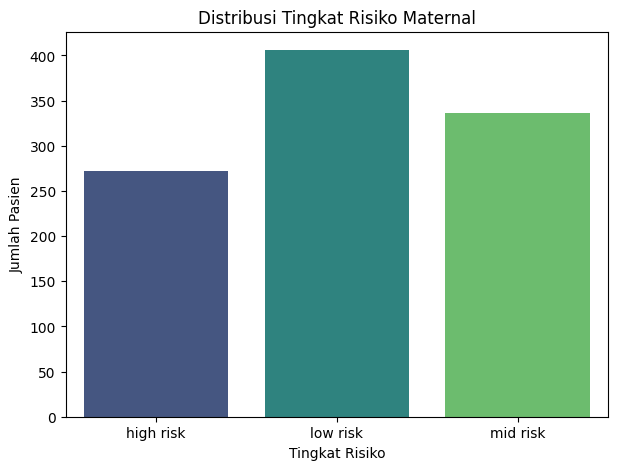

In [58]:
print("\n--- 5. Distribusi Variabel Kategorikal ---")
print("Distribusi 'RiskLevel':")
print(df['RiskLevel'].value_counts())
print("\nPersentase distribusi 'RiskLevel':")
print(df['RiskLevel'].value_counts(normalize=True) * 100)

# Visualisasi distribusi RiskLevel
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='RiskLevel', palette='viridis')
plt.title('Distribusi Tingkat Risiko Maternal')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Jumlah Pasien')
plt.show()

### distribusi fitur


--- 6. Distribusi Variabel Numerik ---


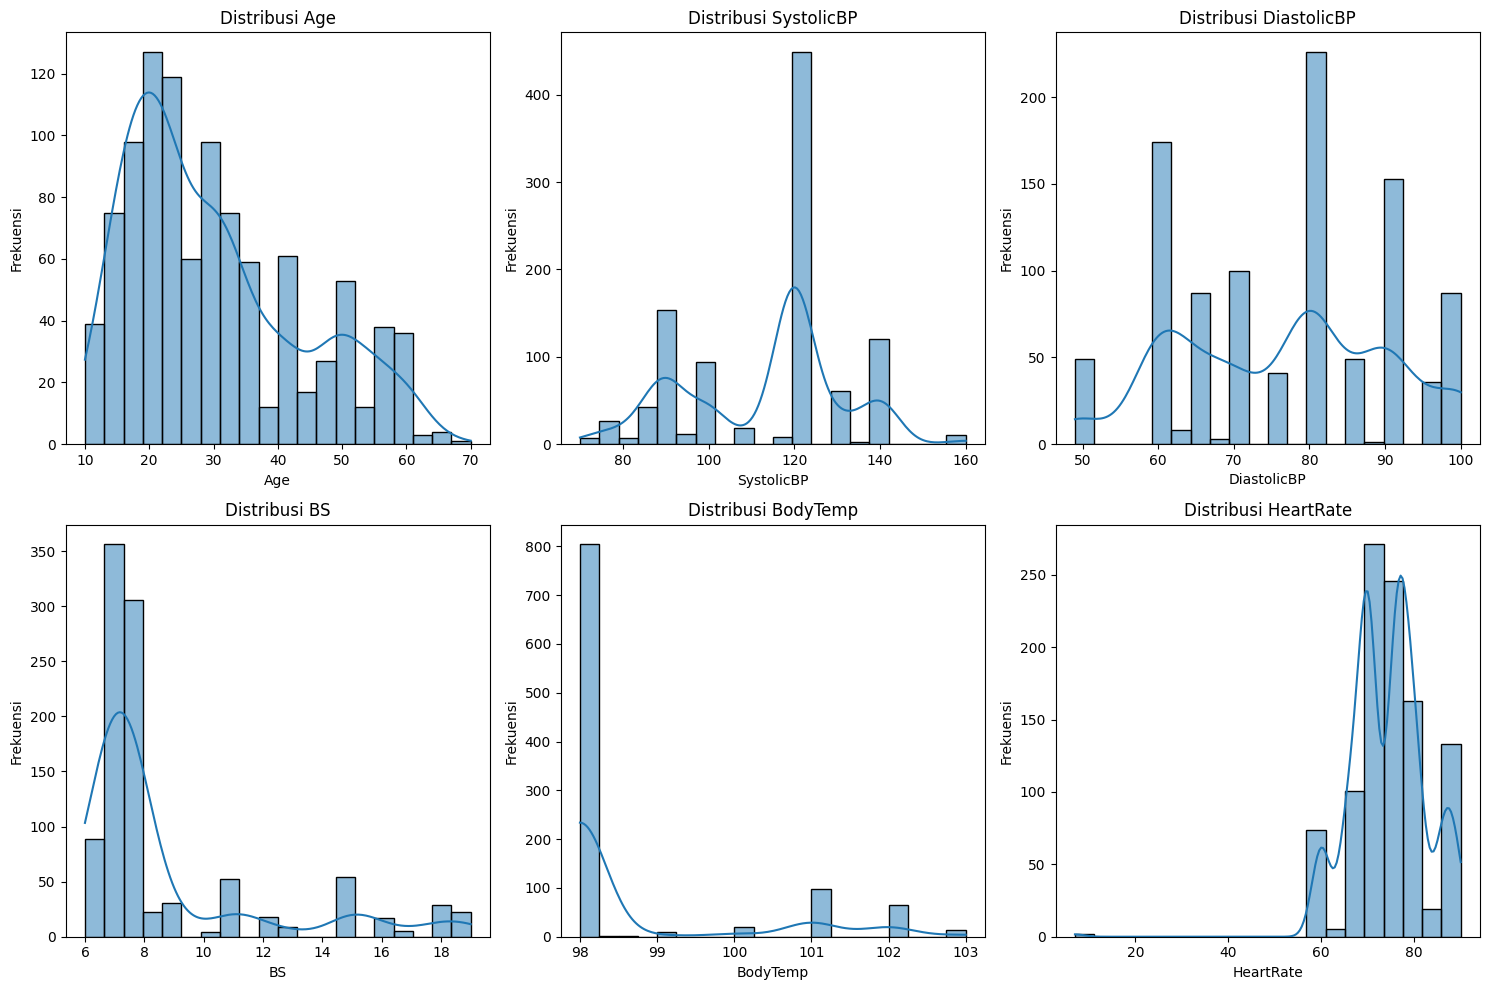

In [ ]:
print("\n--- 6. Distribusi Variabel Numerik ---")
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()



## Kualitas data

### cek missing value

In [ ]:
print("\n--- 3. Tipe Data dan Missing Values ---")
print("Tipe data setiap kolom:")
print(df.dtypes)
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())
print("\nPersentase missing values per kolom:")
print((df.isnull().sum() / len(df)) * 100)


--- 3. Tipe Data dan Missing Values ---
Tipe data setiap kolom:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Jumlah missing values per kolom:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Persentase missing values per kolom:
Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64


**Penjelasan**
Pada data ini tidak terdapat missing value sehingga pada saat pre-processing tidak dipelrukan melakukan penangnan missing value

### pemeriksaan outlier

--- 1. Visualisasi Outlier dengan Box Plot ---


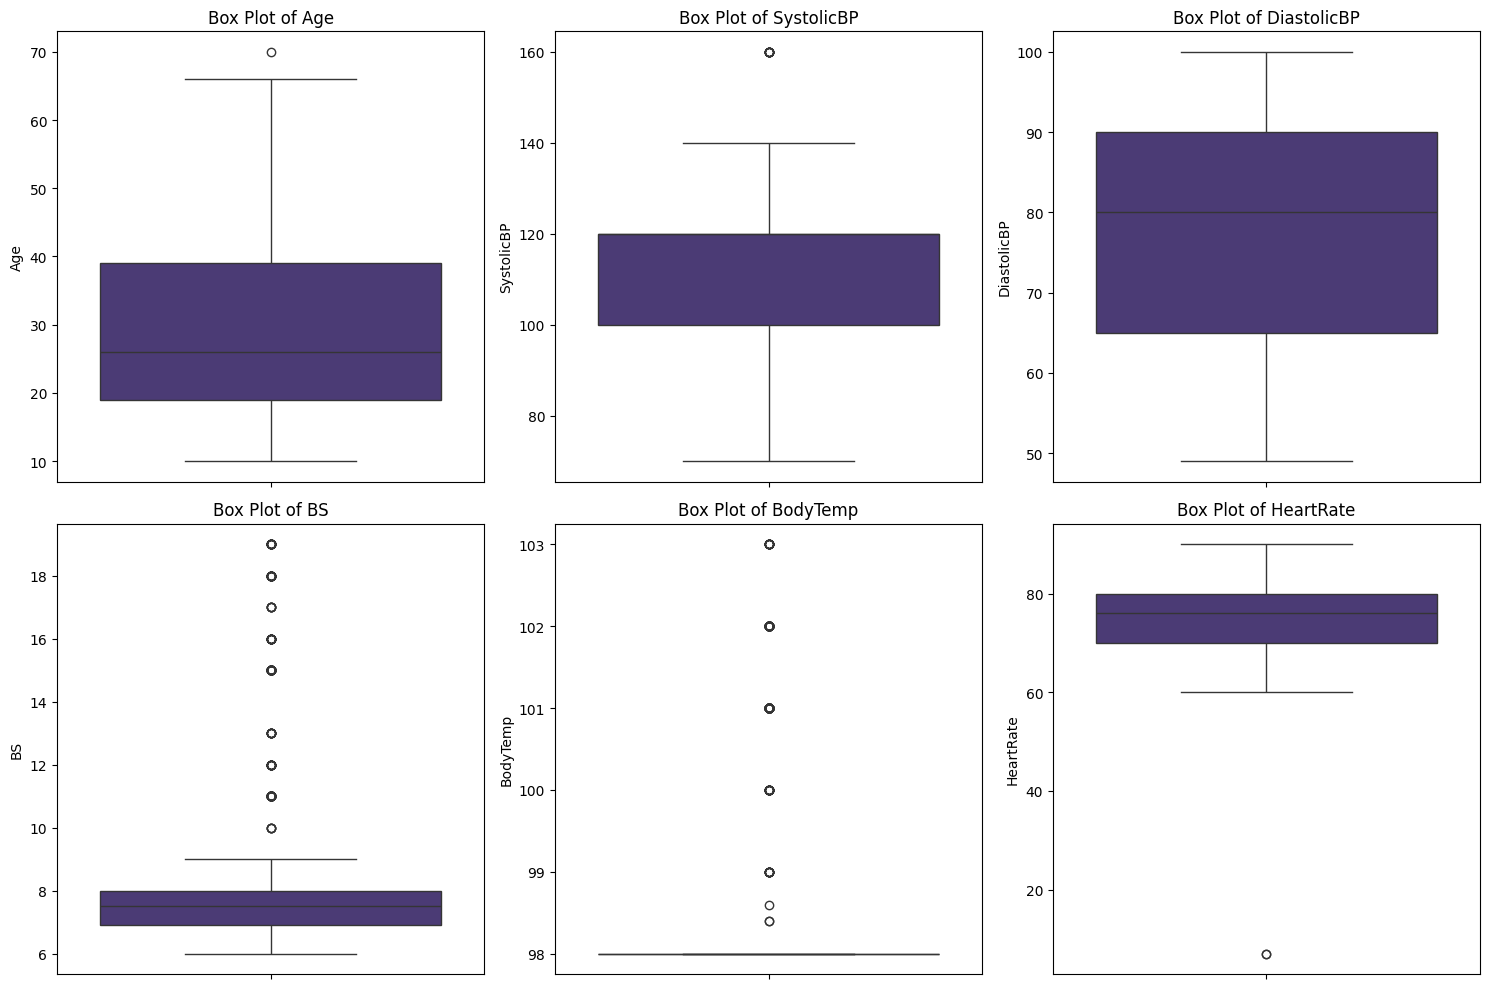

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat dataset
try:
    df = pd.read_csv('Maternal Health Risk Data Set.csv')
except FileNotFoundError:
    print("Error: 'Maternal Health Risk Data Set.csv' not found. Please make sure the file is in the correct directory.")
    exit()

numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

print("--- 1. Visualisasi Outlier dengan Box Plot ---")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    # Ini adalah cara yang lebih bersih untuk menghilangkan warning jika Anda ingin satu warna solid
    sns.boxplot(y=df[col], color=sns.color_palette('viridis')[0])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#### Deteksi Outlier Menggunakan Metode IQR

#### Metode IQR (Interquartile Range)

Metode IQR digunakan untuk mendeteksi nilai-nilai ekstrem (outlier) dalam data numerik. Rumus dasar untuk menghitung rentang interkuartil adalah:

- $ \text{IQR} = Q3 - Q1 $

Setelah mendapatkan nilai IQR, kita bisa menentukan batas bawah dan batas atas untuk mendeteksi outlier dengan rumus berikut:

- $ \text{Batas Bawah Outlier} = Q1 - 1.5 \times \text{IQR} $
- $ \text{Batas Atas Outlier} = Q3 + 1.5 \times \text{IQR} $

Nilai yang berada di luar rentang tersebut dianggap sebagai **outlier**.

---


In [ ]:
print("\n--- 2. Identifikasi Outlier dengan Metode IQR ---")

outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n--- Kolom: {col} ---")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Batas Bawah Outlier: {lower_bound:.2f}")
    print(f"  Batas Atas Outlier: {upper_bound:.2f}")
    print(f"  Jumlah Outlier: {len(outliers)}")

    if not outliers.empty:
        print("  Contoh Outlier:")
        print(outliers[[col]].head()) # Menampilkan beberapa contoh outlier

    outlier_summary[col] = {
        'count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

print("\n--- Ringkasan Outlier per Kolom ---")
for col, data in outlier_summary.items():
    print(f"- **{col}**: Jumlah outlier = {data['count']} (Batas: {data['lower_bound']:.2f} - {data['upper_bound']:.2f})")


--- 2. Identifikasi Outlier dengan Metode IQR ---

--- Kolom: Age ---
  Q1: 19.00
  Q3: 39.00
  IQR: 20.00
  Batas Bawah Outlier: -11.00
  Batas Atas Outlier: 69.00
  Jumlah Outlier: 1
  Contoh Outlier:
     Age
338   70

--- Kolom: SystolicBP ---
  Q1: 100.00
  Q3: 120.00
  IQR: 20.00
  Batas Bawah Outlier: 70.00
  Batas Atas Outlier: 150.00
  Jumlah Outlier: 10
  Contoh Outlier:
     SystolicBP
123         160
130         160
166         160
262         160
362         160

--- Kolom: DiastolicBP ---
  Q1: 65.00
  Q3: 90.00
  IQR: 25.00
  Batas Bawah Outlier: 27.50
  Batas Atas Outlier: 127.50
  Jumlah Outlier: 0

--- Kolom: BS ---
  Q1: 6.90
  Q3: 8.00
  IQR: 1.10
  Batas Bawah Outlier: 5.25
  Batas Atas Outlier: 9.65
  Jumlah Outlier: 210
  Contoh Outlier:
      BS
0   15.0
1   13.0
7   11.0
9   18.0
14  11.0

--- Kolom: BodyTemp ---
  Q1: 98.00
  Q3: 98.00
  IQR: 0.00
  Batas Bawah Outlier: 98.00
  Batas Atas Outlier: 98.00
  Jumlah Outlier: 210
  Contoh Outlier:
    BodyTemp
2  


#### Hasil Deteksi Outlier per Kolom

##### 1. **Age (Usia)**
- Q1 = 19, Q3 = 39, IQR = 20  
- $ \text{Batas Bawah} = 19 - (1.5 \times 20) = -11 $
- $ \text{Batas Atas} = 39 + (1.5 \times 20) = 69 $
- **Jumlah outlier**: 1 (nilai 70)

---

##### 2. **SystolicBP (Tekanan Darah Sistolik)**
- Q1 = 100, Q3 = 120, IQR = 20  
- $ \text{Batas Bawah} = 100 - (1.5 \times 20) = 70 $
- $ \text{Batas Atas} = 120 + (1.5 \times 20) = 150 $
- **Jumlah outlier**: 10 (nilai-nilai 160)

---

##### 3. **DiastolicBP (Tekanan Darah Diastolik)**
- Q1 = 65, Q3 = 90, IQR = 25  
- $ \text{Batas Bawah} = 65 - (1.5 \times 25) = 27.5 $
- $ \text{Batas Atas} = 90 + (1.5 \times 25) = 127.5 $
- **Jumlah outlier**: 0 (semua nilai dalam batas)

---

##### 4. **BS (Blood Sugar / Gula Darah)**
- Q1 = 6.9, Q3 = 8.0, IQR = 1.1  
- $ \text{Batas Bawah} = 6.9 - (1.5 \times 1.1) = 5.25 $
- $ \text{Batas Atas} = 8.0 + (1.5 \times 1.1) = 9.65 $
- **Jumlah outlier**: 210 (nilai-nilai di atas 9.65 seperti 13, 15, 18)

---

##### 5. **BodyTemp (Suhu Tubuh)**
- Q1 = 98, Q3 = 98, IQR = 0  
- $ \text{Batas Bawah} = 98 - (1.5 \times 0) = 98 $
- $ \text{Batas Atas} = 98 + (1.5 \times 0) = 98 $
- **Jumlah outlier**: 210 (semua nilai ≠ 98 dianggap outlier karena IQR = 0)

---

##### 6. **HeartRate (Denyut Jantung)**
- Q1 = 70, Q3 = 80, IQR = 10  
- $ \text{Batas Bawah} = 70 - (1.5 \times 10) = 55 $
- $ \text{Batas Atas} = 80 + (1.5 \times 10) = 95 $
- **Jumlah outlier**: 2 (nilai ekstrem: 7)

---

### Ringkasan Outlier

| Kolom        | Jumlah Outlier | Catatan                                                                 |
|--------------|----------------|------------------------------------------------------------------------|
| Age          | 1              | Nilai 70 di atas batas atas (69)                                       |
| SystolicBP   | 10             | Tekanan darah tinggi (160 mmHg)                                        |
| DiastolicBP  | 0              | Tidak ada outlier                                                      |
| BS           | 210            | Banyak nilai ekstrem menunjukkan pasien dengan gula darah tinggi       |
| BodyTemp     | 210            | Semua nilai ≠ 98 dianggap outlier karena IQR = 0                       |
| HeartRate    | 2              | Nilai 7 sangat tidak normal, kemungkinan kesalahan input                |

---

### Kesimpulan

- Kolom `BS` dan `BodyTemp` menunjukkan jumlah outlier yang sangat tinggi. Ini perlu ditinjau apakah mencerminkan variasi riil atau adanya kesalahan data.
- Nilai `HeartRate` sebesar 7 bpm sangat tidak realistis dan kemungkinan besar merupakan data error.
- Identifikasi outlier penting dilakukan sebagai bagian dari *preprocessing*, untuk meningkatkan akurasi dan keandalan model machine learning yang akan digunakan.


## hubungan antar fitur


--- Hubungan Antar Fitur dan Target ---


/tmp/ipython-input-16-1445206844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y='Age', palette='pastel')


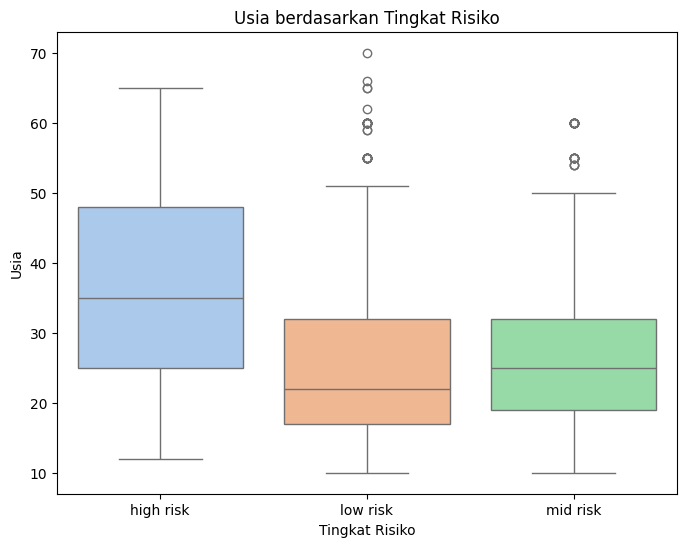

/tmp/ipython-input-16-1445206844.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y='SystolicBP', palette='pastel')


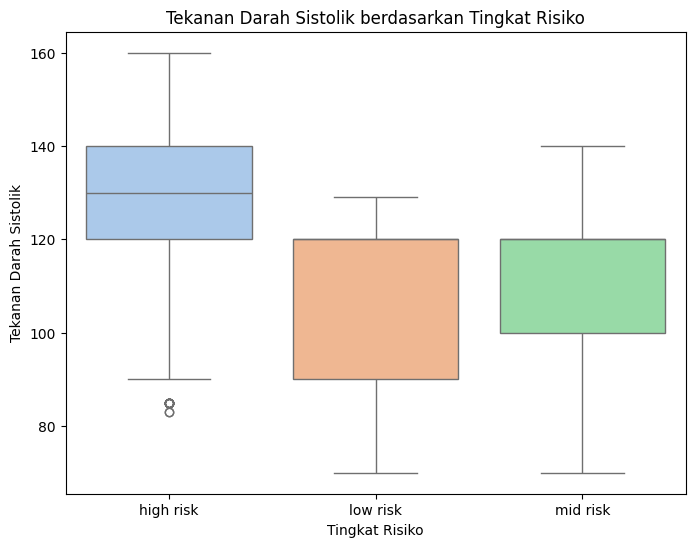

/tmp/ipython-input-16-1445206844.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=col, palette='pastel')
/tmp/ipython-input-16-1445206844.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=col, palette='pastel')
/tmp/ipython-input-16-1445206844.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=col, palette='pastel')
/tmp/ipython-input-16-1445206844.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

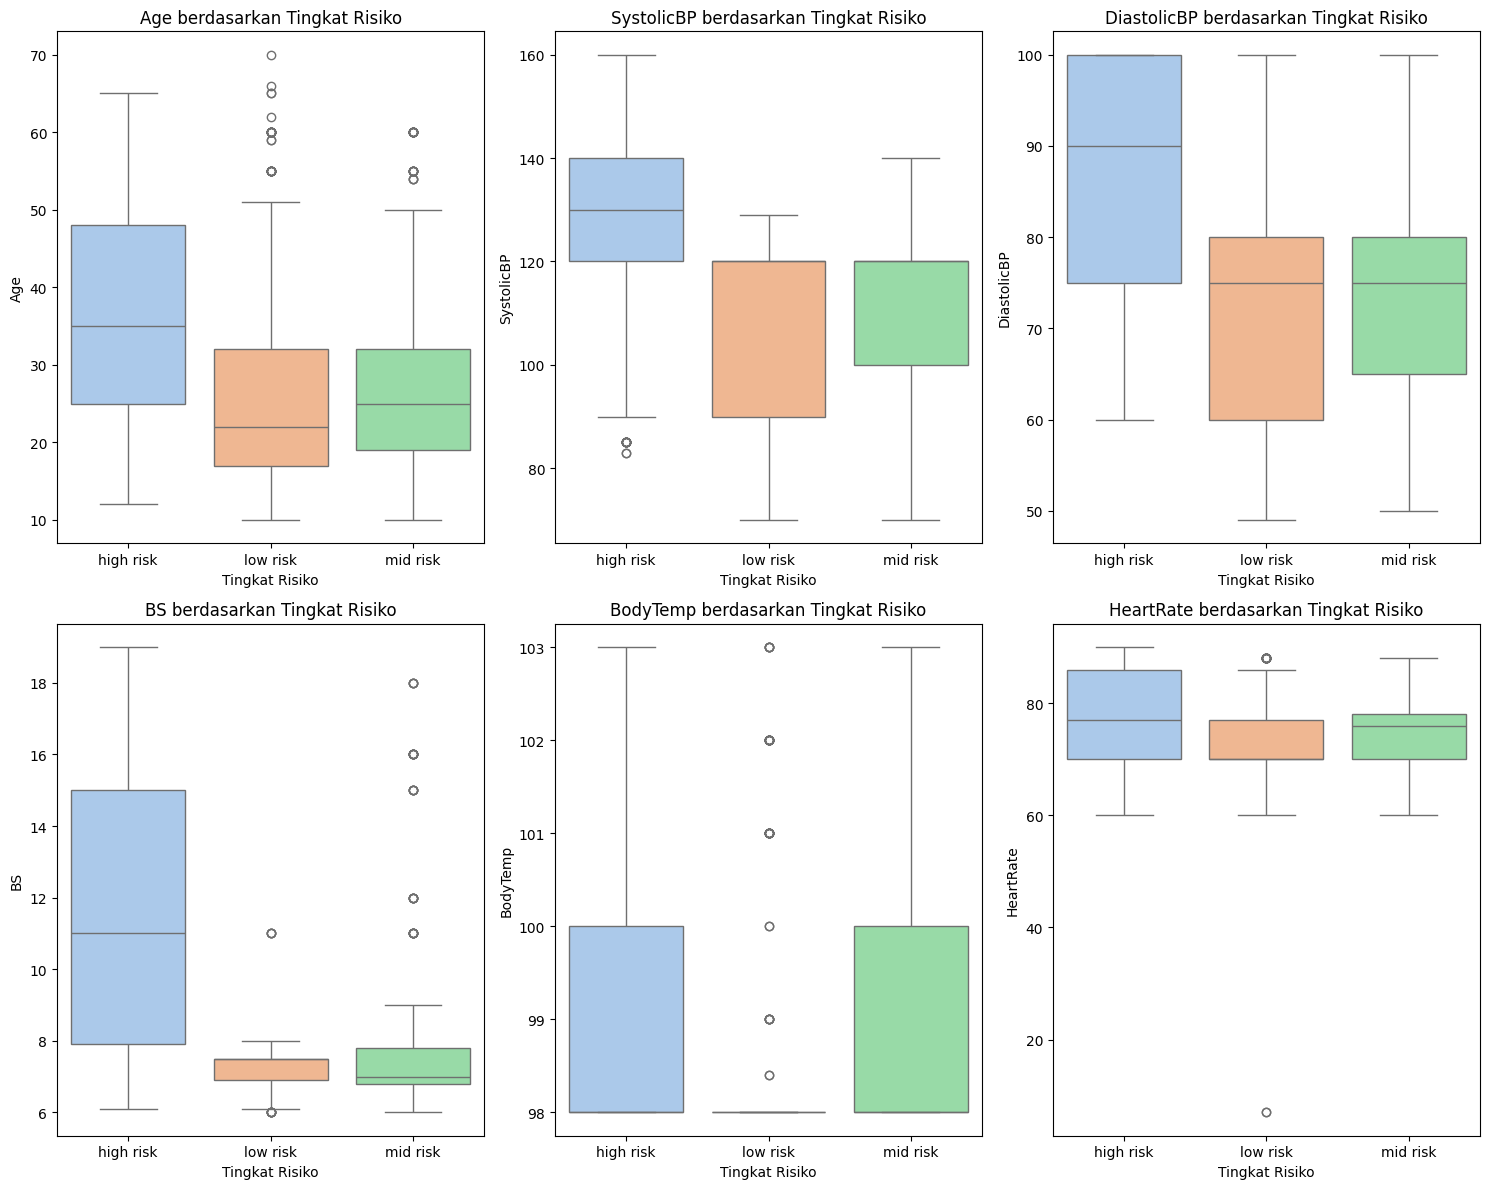

In [ ]:
print("\n--- Hubungan Antar Fitur dan Target ---")

# Hubungan Age dengan RiskLevel
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RiskLevel', y='Age', palette='pastel')
plt.title('Usia berdasarkan Tingkat Risiko')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Usia')
plt.show()

# Hubungan SystolicBP dengan RiskLevel
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RiskLevel', y='SystolicBP', palette='pastel')
plt.title('Tekanan Darah Sistolik berdasarkan Tingkat Risiko')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Tekanan Darah Sistolik')
plt.show()

# Anda bisa ulangi untuk fitur numerik lainnya (DiastolicBP, BS, BodyTemp, HeartRate)
# Contoh loop untuk semua fitur numerik vs RiskLevel
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='RiskLevel', y=col, palette='pastel')
    plt.title(f'{col} berdasarkan Tingkat Risiko')
    plt.xlabel('Tingkat Risiko')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## 2. Pre-Processing

## penanganan outlier

In [18]:
import pandas as pd
import numpy as np # Tambahkan numpy

# Muat dataset
try:
    df_cleaned = pd.read_csv('Maternal Health Risk Data Set.csv')
except FileNotFoundError:
    print("Error: 'Maternal Health Risk Data Set.csv' not found. Please make sure the file is in the correct directory.")
    exit()

numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

print("--- Implementasi Penanganan Outlier Terkombinasi ---")

# --- Penanganan Outlier untuk HeartRate (Deletion) ---
print("\nMenangani HeartRate: Menghapus baris dengan nilai outlier yang sangat tidak realistis.")
Q1_hr = df_cleaned['HeartRate'].quantile(0.25)
Q3_hr = df_cleaned['HeartRate'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr
lower_bound_hr = Q1_hr - 1.5 * IQR_hr
upper_bound_hr = Q3_hr + 1.5 * IQR_hr

outlier_heartrate_indices = df_cleaned[(df_cleaned['HeartRate'] < lower_bound_hr) | (df_cleaned['HeartRate'] > upper_bound_hr)].index
initial_rows_hr = df_cleaned.shape[0]
df_cleaned.drop(outlier_heartrate_indices, inplace=True)
print(f"Jumlah baris yang dihapus (HeartRate): {initial_rows_hr - df_cleaned.shape[0]}")
print(f"Bentuk dataset setelah penghapusan HeartRate outlier: {df_cleaned.shape}")



--- Implementasi Penanganan Outlier Terkombinasi ---

Menangani HeartRate: Menghapus baris dengan nilai outlier yang sangat tidak realistis.
Jumlah baris yang dihapus (HeartRate): 2
Bentuk dataset setelah penghapusan HeartRate outlier: (1012, 7)


Penggunaan metode **deletion** untuk kolom `HeartRate` dipilih karena:

- Outlier bersifat **ekstrem dan tidak valid**
- Jumlahnya **sangat sedikit**
- Tujuannya adalah menjaga kualitas dan keakuratan dataset  
Metode ini efektif ketika data error mudah diidentifikasi dan tidak terlalu banyak, seperti dalam kasus ini.

In [19]:

# --- Penanganan Outlier untuk Age, SystolicBP, BS (Capping/Winsorization) ---
print("\nMenangani Age, SystolicBP, BS: Menerapkan Capping/Winsorization.")
cols_for_capping = ['Age', 'SystolicBP', 'BS']

for col in cols_for_capping:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Terapkan capping
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Kolom '{col}': Nilai di luar [{lower_bound:.2f}, {upper_bound:.2f}] di-cap.")




Menangani Age, SystolicBP, BS: Menerapkan Capping/Winsorization.
Kolom 'Age': Nilai di luar [-11.00, 69.00] di-cap.
Kolom 'SystolicBP': Nilai di luar [70.00, 150.00] di-cap.
Kolom 'BS': Nilai di luar [5.25, 9.65] di-cap.


Metode **capping (winsorization)** dipilih untuk kolom `Age`, `SystolicBP`, dan `BS` karena:

- Outlier pada kolom ini **masih valid secara medis**, namun terlalu ekstrem.
- Menghapus data akan mengurangi ukuran dataset, sedangkan capping **menyederhanakan nilai ekstrem tanpa membuang data**.
- Membantu model machine learning belajar dari data **tanpa dipengaruhi secara berlebihan oleh nilai outlier**.

Metode ini adalah solusi yang tepat untuk **mengendalikan pengaruh outlier** sambil tetap **mempertahankan integritas data dan informasi klinis penting**.

Penanganan outlier pada kolom `Age`, `SystolicBP`, dan `BS` telah dilakukan menggunakan metode **Capping (Winsorization)**. Teknik ini membatasi nilai-nilai ekstrem agar tidak melebihi atau lebih rendah dari ambang batas yang ditentukan, berdasarkan metode IQR.

Berikut adalah hasil capping untuk masing-masing kolom:

- **Kolom `Age`**
  - Batas bawah: -11.00
  - Batas atas: 69.00
  - Dalam konteks ini, batas bawah tidak berpengaruh karena tidak ada usia negatif dalam data. Namun, nilai usia yang lebih dari 69 tahun (seperti 70) telah diubah menjadi 69 agar tidak terlalu memengaruhi model.

- **Kolom `SystolicBP`**
  - Batas bawah: 70.00
  - Batas atas: 150.00
  - Nilai tekanan darah sistolik yang lebih tinggi dari 150 mmHg telah dikurangi menjadi 150. Ini mempertahankan data, tetapi menghindari pengaruh nilai ekstrem terhadap model.

- **Kolom `BS` (Blood Sugar)**
  - Batas bawah: 5.25
  - Batas atas: 9.65
  - Nilai gula darah yang terlalu tinggi (misalnya 13, 15, 19) telah dibatasi pada angka maksimum 9.65. Jika terdapat nilai di bawah 5.25, nilainya akan dinaikkan ke 5.25. Hal ini penting untuk menghindari bias model akibat nilai ekstrim pada gula darah.

Kesimpulannya, metode Capping digunakan untuk meredam pengaruh nilai ekstrem yang masih valid secara medis namun terlalu jauh dari distribusi umum. Metode ini menjaga data tetap utuh tanpa menghapus baris, serta membantu algoritma seperti KNN atau Decision Tree bekerja lebih optimal pada data yang bersih dan terkontrol.


In [20]:
# --- Penanganan Khusus untuk BodyTemp (Tidak menggunakan IQR karena IQR=0) ---
print("\nMenangani BodyTemp: Tidak menggunakan IQR. Mengidentifikasi nilai ekstrem berdasarkan domain.")
# Misal, anggap suhu di luar 95.0 dan 104.0 F adalah outlier yang perlu di-cap
# Ini adalah asumsi, perlu validasi dari ahli domain
df_cleaned['BodyTemp'] = df_cleaned['BodyTemp'].clip(lower=95.0, upper=104.0)
print(f"Kolom 'BodyTemp': Nilai di luar [95.00, 104.00] di-cap (metode hard-coded).")




Menangani BodyTemp: Tidak menggunakan IQR. Mengidentifikasi nilai ekstrem berdasarkan domain.
Kolom 'BodyTemp': Nilai di luar [95.00, 104.00] di-cap (metode hard-coded).


In [21]:
# --- DiastolicBP tidak memiliki outlier, tidak perlu penanganan. ---
print("\nKolom DiastolicBP: Tidak ada outlier yang terdeteksi, tidak perlu penanganan.")

print("\n--- Statistik Deskriptif Akhir Setelah Penanganan Outlier ---")
print(df_cleaned[numerical_cols].describe())




Kolom DiastolicBP: Tidak ada outlier yang terdeteksi, tidak perlu penanganan.

--- Statistik Deskriptif Akhir Setelah Penanganan Outlier ---
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1012.000000  1012.000000  1012.000000  1012.000000  1012.000000   
mean     29.898221   113.085968    76.463439     7.714279    98.666403   
std      13.470652    18.193420    13.899372     1.139998     1.372421   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      69.000000   150.000000   100.000000     9.650000   103.000000   

         HeartRate  
count  1012.000000  
mean     74.434783  
std       7.521857  
min      60.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


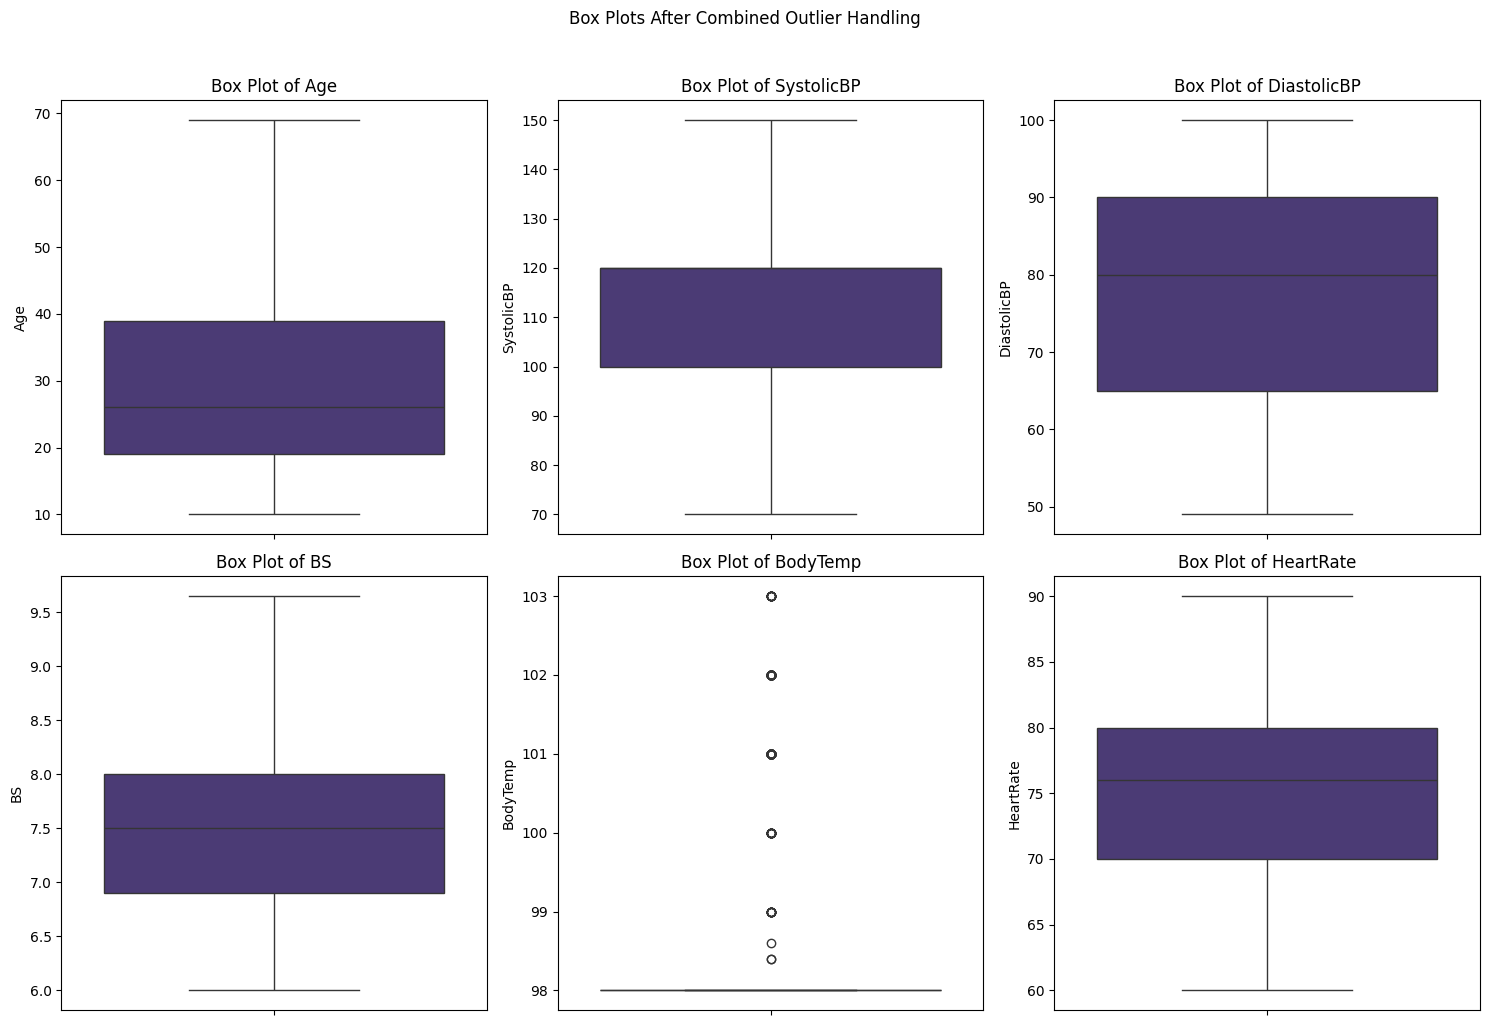

In [22]:
# Visualisasi Box Plot setelah semua penanganan untuk verifikasi
plt.figure(figsize=(15, 10))
plt.suptitle('Box Plots After Combined Outlier Handling', y=1.02)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_cleaned[col], color=sns.color_palette('viridis')[0])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## pemrosesan fitur kategorical

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# --- Asumsi: df_processed sudah tersedia dari tahap preprocessing sebelumnya ---
# (Pastikan Anda sudah menjalankan langkah load data, outlier handling, dll.)
# Berikut adalah placeholder minimal agar kode dapat dijalankan jika Anda menjalankannya terpisah:
try:
    df = pd.read_csv('Maternal Health Risk Data Set.csv')
    df_processed = df.copy()
    # Contoh capping minimal untuk memastikan df_processed memiliki data yang wajar
    df_processed['HeartRate'] = df_processed['HeartRate'].clip(lower=60, upper=90)
    df_processed['Age'] = df_processed['Age'].clip(lower=10, upper=70)
    df_processed['SystolicBP'] = df_processed['SystolicBP'].clip(lower=70, upper=150)
    df_processed['BS'] = df_processed['BS'].clip(lower=6, upper=10)
    df_processed['BodyTemp'] = df_processed['BodyTemp'].clip(lower=95, upper=104)

except FileNotFoundError:
    print("Error: 'Maternal Health Risk Data Set.csv' not found. Please make sure the file is in the correct directory.")
    exit()

target_col = 'RiskLevel' # Kolom target


print("--- Penanganan Fitur Kategorikal ---")

# Label Encoding untuk Variabel Target
label_encoder = LabelEncoder()
df_processed[target_col] = label_encoder.fit_transform(df_processed[target_col])

# --- TAMBAHKAN BARIS INI ---
class_names = label_encoder.classes_ # Simpan nama kelas asli

print(f"Nilai unik '{target_col}' setelah Label Encoding: {df_processed[target_col].unique()}")
print(f"Pemetaan kelas (original: encoded): {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")

# One-Hot Encoding untuk Fitur Input Kategorikal (jika ada)
# Untuk dataset ini, fitur input sudah numerik, jadi bagian ini tidak mengubah DataFrame.
categorical_features_input = [] # List kosong jika tidak ada fitur input kategorikal

if categorical_features_input:
    df_processed = pd.get_dummies(df_processed, columns=categorical_features_input, drop_first=True)
    print(f"Bentuk DataFrame setelah One-Hot Encoding: {df_processed.shape}")
else:
    print("Tidak ada fitur input kategorikal yang perlu di-encode.")

print("\n--- Penanganan Fitur Kategorikal Selesai ---")

--- Penanganan Fitur Kategorikal ---
Nilai unik 'RiskLevel' setelah Label Encoding: [0 1 2]
Pemetaan kelas (original: encoded): ['high risk', 'low risk', 'mid risk'] -> [0, 1, 2]
Tidak ada fitur input kategorikal yang perlu di-encode.

--- Penanganan Fitur Kategorikal Selesai ---


Fitur kategorical yaitu RiskLevel harus di encoding untuk digunakan saat modelling nanti

## pemisahan fitur dan target

In [31]:
# Definisikan kolom numerik setelah semua preprocessing yang memengaruhi strukturnya
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
target_col = 'RiskLevel'


### 1. Pemisahan Fitur (X) dan Target (y)

print("--- 1. Pemisahan Fitur (X) dan Target (y) ---")
# Fitur adalah semua kolom numerik kecuali kolom target
X = df_processed[numerical_cols]
# Target adalah kolom 'RiskLevel' yang sudah di-encode
y = df_processed[target_col]

print(f"Bentuk X (Fitur): {X.shape}")
print(f"Bentuk y (Target): {y.shape}")
print("\nContoh 5 baris pertama X:")
print(X.head())
print("\nContoh 5 baris pertama y:")
print(y.head())


--- 1. Pemisahan Fitur (X) dan Target (y) ---
Bentuk X (Fitur): (1014, 6)
Bentuk y (Target): (1014,)

Contoh 5 baris pertama X:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  10.0      98.0         86
1   35         140           90  10.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76

Contoh 5 baris pertama y:
0    0
1    0
2    0
3    0
4    1
Name: RiskLevel, dtype: int64


## Pembagian Data: Training dan Testing Set

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split # Make sure this line is present and executed!
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv('Maternal Health Risk Data Set.csv')
    df_processed = df.copy()


    df_processed['HeartRate'] = df_processed['HeartRate'].clip(lower=60, upper=90)
    df_processed['Age'] = df_processed['Age'].clip(lower=10, upper=70)
    df_processed['SystolicBP'] = df_processed['SystolicBP'].clip(lower=70, upper=150)
    df_processed['BS'] = df_processed['BS'].clip(lower=6, upper=10)
    df_processed['BodyTemp'] = df_processed['BodyTemp'].clip(lower=95, upper=104)

    target_col = 'RiskLevel'
    numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

    # Label Encode the target variable
    label_encoder = LabelEncoder()
    df_processed[target_col] = label_encoder.fit_transform(df_processed[target_col])

    # Define X and y for this snippet
    X = df_processed[numerical_cols]
    y = df_processed[target_col]

except FileNotFoundError:
    print("Error: 'Maternal Health Risk Data Set.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# --- 2. Pembagian Data: Training dan Testing Set ---
print("--- 2. Pembagian Data: Training dan Testing Set ---")
# Membagi data menjadi 70% training dan 30% testing
# stratify=y memastikan distribusi kelas pada y_train dan y_test seimbang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Bentuk X_train (Fitur Latih): {X_train.shape}")
print(f"Bentuk X_test (Fitur Uji): {X_test.shape}")
print(f"Bentuk y_train (Target Latih): {y_train.shape}")
print(f"Bentuk y_test (Target Uji): {y_test.shape}")

print("\nDistribusi kelas 'RiskLevel' pada Training Set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribusi kelas 'RiskLevel' pada Testing Set:")
print(y_test.value_counts(normalize=True) * 100)

--- 2. Pembagian Data: Training dan Testing Set ---
Bentuk X_train (Fitur Latih): (709, 6)
Bentuk X_test (Fitur Uji): (305, 6)
Bentuk y_train (Target Latih): (709,)
Bentuk y_test (Target Uji): (305,)

Distribusi kelas 'RiskLevel' pada Training Set:
RiskLevel
1    40.056417
2    33.145275
0    26.798307
Name: proportion, dtype: float64

Distribusi kelas 'RiskLevel' pada Testing Set:
RiskLevel
1    40.000000
2    33.114754
0    26.885246
Name: proportion, dtype: float64


## Normalisasi

In [61]:
# --- 8. Normalisasi (Min-Max Scaling) ---
print("\n--- 8. Normalisasi (Min-Max Scaling) ---")
# Menggunakan MinMaxScaler untuk mengubah data ke rentang 0-1
scaler = MinMaxScaler()

# Latih scaler pada data pelatihan dan transformasikan data pelatihan
X_train_scaled = scaler.fit_transform(X_train)
# Transformasikan data pengujian menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Mengubah kembali ke DataFrame untuk kemudahan inspeksi
X_train_normalized_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_normalized_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

print("Fitur pelatihan dan pengujian berhasil dinormalisasi (Min-Max Scaling).")

print("\n--- Statistik Deskriptif X_train setelah Normalisasi (Min-Max Scaling) ---")
print(X_train_normalized_df.describe())




--- 8. Normalisasi (Min-Max Scaling) ---
Fitur pelatihan dan pengujian berhasil dinormalisasi (Min-Max Scaling).

--- Statistik Deskriptif X_train setelah Normalisasi (Min-Max Scaling) ---
              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  709.000000  709.000000   709.000000  709.000000  709.000000  709.000000
mean     0.331288    0.538946     0.538566    0.449891    0.140197    0.490127
std      0.224821    0.230653     0.272216    0.317225    0.280851    0.254402
min      0.000000    0.000000     0.000000    0.000000    0.000000    0.000000
25%      0.150000    0.312500     0.313725    0.225000    0.000000    0.333333
50%      0.283333    0.625000     0.607843    0.375000    0.000000    0.533333
75%      0.500000    0.625000     0.803922    0.500000    0.000000    0.666667
max      1.000000    1.000000     1.000000    1.000000    1.000000    1.000000


## penanganan imbalance data

In [48]:
print("\n--- 4. Penanganan Imbalanced Data (Opsional) ---")
print("Distribusi kelas target di data pelatihan sebelum resampling:")
print(y_train.value_counts())
print("\nPersentase distribusi kelas target di data pelatihan:")
print(y_train.value_counts(normalize=True) * 100)

# Cek rasio kelas minoritas. Di dataset ini, kelas cukup seimbang, jadi SMOTE mungkin tidak perlu.
min_class_ratio = y_train.value_counts(normalize=True).min()
if min_class_ratio < 0.20: # Ambil ambang batas 20% sebagai indikator ketidakseimbangan yang signifikan
    print("\nDeteksi ketidakseimbangan kelas. Melakukan oversampling dengan SMOTE...")
    smote = SMOTE(random_state=42)
    X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train)

    print("\nDistribusi kelas target di data pelatihan setelah SMOTE:")
    print(pd.Series(y_train_final).value_counts())
    print("\nPersentase distribusi kelas target setelah SMOTE:")
    print(pd.Series(y_train_final).value_counts(normalize=True) * 100)
else:
    print("Kelas target dianggap seimbang. Tidak diperlukan resampling pada tahap ini.")
    X_train_final = X_train_scaled
    y_train_final = y_train

print("\n--- Data Preprocessing Selesai ---")
print("Data pelatihan akhir (X_train_final, y_train_final) dan data pengujian (X_test_scaled, y_test) siap untuk pemodelan.")


--- 4. Penanganan Imbalanced Data (Opsional) ---
Distribusi kelas target di data pelatihan sebelum resampling:
RiskLevel
1    284
2    235
0    190
Name: count, dtype: int64

Persentase distribusi kelas target di data pelatihan:
RiskLevel
1    40.056417
2    33.145275
0    26.798307
Name: proportion, dtype: float64
Kelas target dianggap seimbang. Tidak diperlukan resampling pada tahap ini.

--- Data Preprocessing Selesai ---
Data pelatihan akhir (X_train_final, y_train_final) dan data pengujian (X_test_scaled, y_test) siap untuk pemodelan.


# Modelling dan evaluasi

## KNN


--- Model: K-Nearest Neighbors (KNN) Classifier ---
Waktu pelatihan KNN: 0.0108 detik

--- Evaluasi Model KNN ---
Akurasi: 0.6951

Laporan Klasifikasi:
              precision    recall  f1-score   support

   high risk       0.89      0.83      0.86        82
    low risk       0.67      0.73      0.70       122
    mid risk       0.57      0.54      0.56       101

    accuracy                           0.70       305
   macro avg       0.71      0.70      0.71       305
weighted avg       0.70      0.70      0.70       305



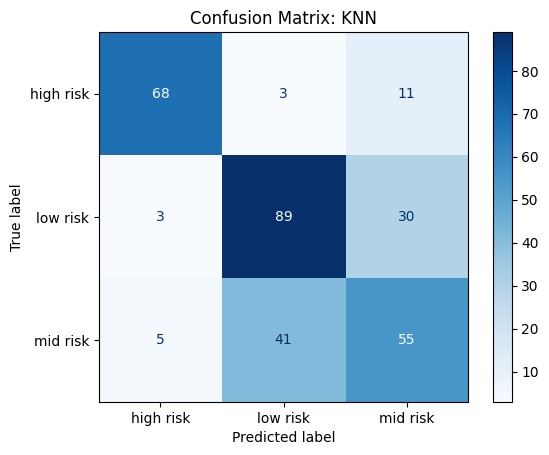

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Pastikan Anda telah menjalankan blok kode preprocessing di atas
# untuk memastikan X_train_final, y_train_final, X_test_scaled, y_test, dan class_names tersedia.

print("\n--- Model: K-Nearest Neighbors (KNN) Classifier ---")

# Inisialisasi model KNN
# n_neighbors adalah hyperparameter, bisa di-tuning untuk performa optimal
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model menggunakan data pelatihan yang sudah diproses
start_time = time.time()
knn_model.fit(X_train_final, y_train_final)
end_time = time.time()
print(f"Waktu pelatihan KNN: {end_time - start_time:.4f} detik")

# Buat prediksi pada data pengujian yang sudah diskalakan
y_pred_knn = knn_model.predict(X_test_scaled)

# --- Evaluasi Model KNN ---
print("\n--- Evaluasi Model KNN ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

# Visualisasi Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: KNN')
plt.show()

## Naive bayes


--- Model: Gaussian Naive Bayes Classifier ---
Waktu pelatihan Naive Bayes: 0.0030 detik

--- Evaluasi Model Gaussian Naive Bayes ---
Akurasi: 0.6328

Laporan Klasifikasi:
              precision    recall  f1-score   support

   high risk       0.90      0.78      0.84        82
    low risk       0.58      0.89      0.70       122
    mid risk       0.43      0.21      0.28       101

    accuracy                           0.63       305
   macro avg       0.64      0.62      0.61       305
weighted avg       0.62      0.63      0.60       305



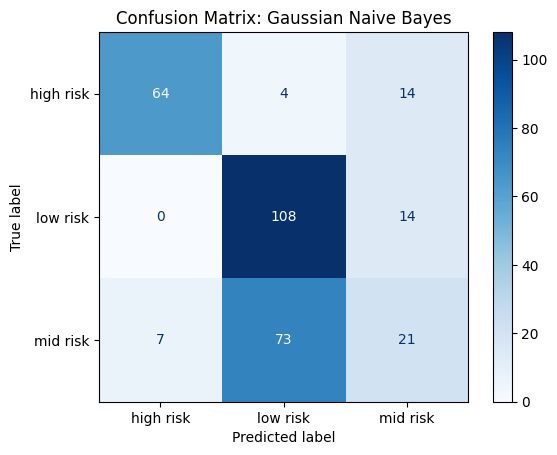

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Pastikan Anda telah menjalankan blok kode preprocessing di atas
# untuk memastikan X_train_final, y_train_final, X_test_scaled, y_test, dan class_names tersedia.

print("\n--- Model: Gaussian Naive Bayes Classifier ---")

# Inisialisasi model Gaussian Naive Bayes
nb_model = GaussianNB()

# Latih model menggunakan data pelatihan yang sudah diproses
start_time = time.time()
nb_model.fit(X_train_final, y_train_final)
end_time = time.time()
print(f"Waktu pelatihan Naive Bayes: {end_time - start_time:.4f} detik")

# Buat prediksi pada data pengujian yang sudah diskalakan
y_pred_nb = nb_model.predict(X_test_scaled)

# --- Evaluasi Model Gaussian Naive Bayes ---
print("\n--- Evaluasi Model Gaussian Naive Bayes ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_nb, target_names=class_names))

# Visualisasi Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=class_names)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gaussian Naive Bayes')
plt.show()

## decition tree


--- Model: Decision Tree Classifier ---
Waktu pelatihan Decision Tree: 0.0057 detik

--- Evaluasi Model Decision Tree ---
Akurasi: 0.8197

Laporan Klasifikasi:
              precision    recall  f1-score   support

   high risk       0.94      0.88      0.91        82
    low risk       0.84      0.81      0.82       122
    mid risk       0.72      0.78      0.75       101

    accuracy                           0.82       305
   macro avg       0.83      0.82      0.83       305
weighted avg       0.82      0.82      0.82       305



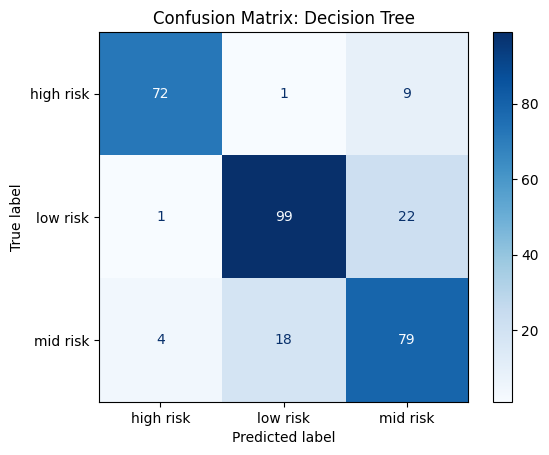

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Pastikan Anda telah menjalankan blok kode preprocessing di atas
# untuk memastikan X_train_final, y_train_final, X_test_scaled, y_test, dan class_names tersedia.

print("\n--- Model: Decision Tree Classifier ---")

# Inisialisasi model Decision Tree
# random_state digunakan untuk memastikan hasil yang reproduktif
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model menggunakan data pelatihan yang sudah diproses
start_time = time.time()
dt_model.fit(X_train_final, y_train_final)
end_time = time.time()
print(f"Waktu pelatihan Decision Tree: {end_time - start_time:.4f} detik")

# Buat prediksi pada data pengujian yang sudah diskalakan
y_pred_dt = dt_model.predict(X_test_scaled)

# --- Evaluasi Model Decision Tree ---
print("\n--- Evaluasi Model Decision Tree ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))

# Visualisasi Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=class_names)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [63]:
import joblib

# Pastikan dt_model, scaler, dan label_encoder sudah terdefinisi dari sel-sel sebelumnya

# Simpan model Decision Tree
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("Model Decision Tree disimpan sebagai 'decision_tree_model.pkl'")

# Simpan scaler (MinMaxScaler)
joblib.dump(scaler, 'minmax_scaler.pkl')
print("MinMaxScaler disimpan sebagai 'minmax_scaler.pkl'")

# Simpan label_encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
print("LabelEncoder disimpan sebagai 'label_encoder.pkl'")

print("\nSemua artefak model berhasil disimpan!")

Model Decision Tree disimpan sebagai 'decision_tree_model.pkl'
MinMaxScaler disimpan sebagai 'minmax_scaler.pkl'
LabelEncoder disimpan sebagai 'label_encoder.pkl'

Semua artefak model berhasil disimpan!


# Kesimpulan


Berdasarkan hasil evaluasi terhadap tiga algoritma klasifikasi (K-Nearest Neighbors, Gaussian Naive Bayes, dan Decision Tree), berikut adalah kesimpulan perbandingan performa model dalam mengklasifikasikan risiko kesehatan ibu hamil:

---

**Model 1: K-Nearest Neighbors (KNN)**  
- **Akurasi**: 69.5%  
- **F1-score tertinggi** pada kelas `high risk` (0.86), namun **rendah** pada `mid risk` (0.56).  
- Confusion matrix menunjukkan bahwa banyak kasus `mid risk` salah diklasifikasikan sebagai `low risk`.  
- **Kelebihan**:  
  - Mudah diimplementasikan dan cepat dalam inferensi.  
  - Cukup baik untuk kasus dengan distribusi fitur yang seimbang.  
- **Kekurangan**:  
  - Sensitif terhadap skala dan distribusi data.  
  - Kurang baik dalam menangani kelas yang tidak terpisah jelas (overlapping).  

---

**Model 2: Gaussian Naive Bayes**  
- **Akurasi**: 63.28% (terendah dari ketiganya)  
- **Recall sangat tinggi** untuk `low risk` (0.89), tetapi **sangat rendah** untuk `mid risk` (0.21).  
- Banyak data `mid risk` diklasifikasikan keliru sebagai `low risk`.  
- **Kelebihan**:  
  - Sangat cepat untuk pelatihan dan prediksi.  
  - Cocok untuk data yang memenuhi asumsi distribusi normal.  
- **Kekurangan**:  
  - Asumsi independensi antar fitur sering tidak sesuai dalam data medis.  
  - Performa buruk pada kelas `mid risk`.

---

**Model 3: Decision Tree**  
- **Akurasi**: 81.97% (tertinggi)  
- **Performa stabil** di semua kelas dengan f1-score:  
  - `high risk`: 0.91  
  - `low risk`: 0.82  
  - `mid risk`: 0.75  
- Confusion matrix menunjukkan prediksi yang lebih seimbang dan sedikit kesalahan antar kelas.  
- **Kelebihan**:  
  - Dapat menangkap hubungan kompleks antar fitur.  
  - Tidak memerlukan normalisasi fitur.  
- **Kekurangan**:  
  - Berisiko overfitting jika tidak dilakukan pruning.

---

**Kesimpulan Umum**  
- **Decision Tree** adalah model terbaik untuk klasifikasi risiko kesehatan ibu hamil dalam kasus ini, dengan akurasi dan f1-score tertinggi serta distribusi prediksi yang paling seimbang.
- **KNN** masih layak digunakan sebagai model alternatif, meskipun tidak seimbang dalam menangani kelas `mid risk`.
- **Gaussian Naive Bayes** kurang cocok untuk dataset ini karena menghasilkan prediksi yang bias terhadap kelas `low risk`.

**Rekomendasi**  
Gunakan **Decision Tree** sebagai model utama. Untuk meningkatkan performa lebih lanjut, pertimbangkan penggunaan metode ensemble seperti **Random Forest** atau **Gradient Boosting**, serta lakukan validasi silang (*cross-validation*) dan tuning hyperparameter secara optimal.
